## Soru 1 (12 puan):
* Bir derse kaydolan öğrencilerin listesini içeren ekteki "Ogrenci Listesi.xls" dosyasını ```ogr_list``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Açıklama" sütunundaki ```Nan``` değerlerini ```İlk``` değeri ile, diğer değerleri ise ```Tekrar``` değeri ile değiştirin.
* "Açıklama" sütununun ismini "Tekrar Durumu" olacak şekilde değiştirin.
* Öğrenci numarasının 4. ve 5. karakterleri, öğrencinin okula giriş yılının son 2 basamağını temsil etmektedir. Buna göre DataFrame'e, öğrencilerin okula giriş yılı verilerini ```20##``` formatında içeren "Okula Giriş Yılı" isimli bir sütun ekleyin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [1]:
import pandas as pd
import numpy as np

ogr_list = pd.read_excel("Ogrenci Listesi.xls")

ogr_list.fillna("İlk", inplace=True)
ogr_list.loc[ogr_list["Açıklama"] != "İlk",'Açıklama'] = "Tekrar"
ogr_list.rename(columns={"Açıklama":"Tekrar Durumu"}, inplace=True)
ogr_list["Okula Giriş Yılı"] = "20"+ ogr_list["Öğrenci No"].str[3:5]
ogr_list.set_index("Öğrenci No", inplace=True)

print("Number of Rows: ", len(ogr_list.axes[0]))
print("Number of Columns: ",len(ogr_list.axes[1]))
ogr_list

Number of Rows:  241
Number of Columns:  3


,No,Tekrar Durumu,Okula Giriş Yılı
Öğrenci No,,,
MUH0907596,1,Tekrar,2009
MUH0910100,2,Tekrar,2009
MUH0900038,3,Tekrar,2009
MUH0900056,4,Tekrar,2009
MUH1000002,5,Tekrar,2010
...,...,...,...
MUH1410150,237,İlk,2014
MUH1410152,238,İlk,2014
MUH1410153,239,İlk,2014


## Soru 2 (12 puan):
* Öğrencilerin okula giriş yıllarının dersi tekrar durumlarına göre dağılımını (öğrenci sayılarını), yatay yığılmış (stacked) sütun grafik olarak gösterin.
* Derse tekrar kaydolan öğrencilerin, okula kayıt yıllarına göre dağılımlarını (yüzdelerini) pasta grafik olarak gösterin.

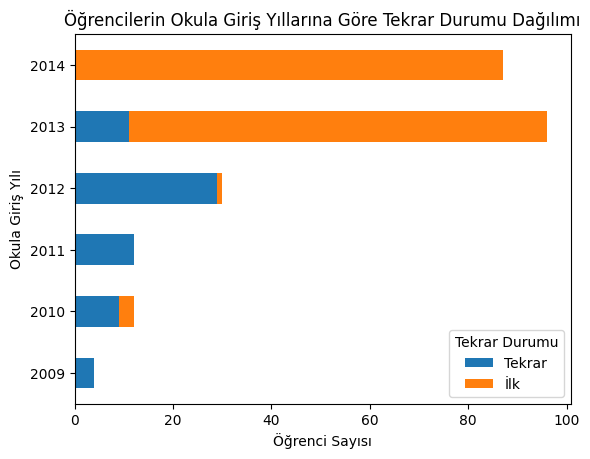

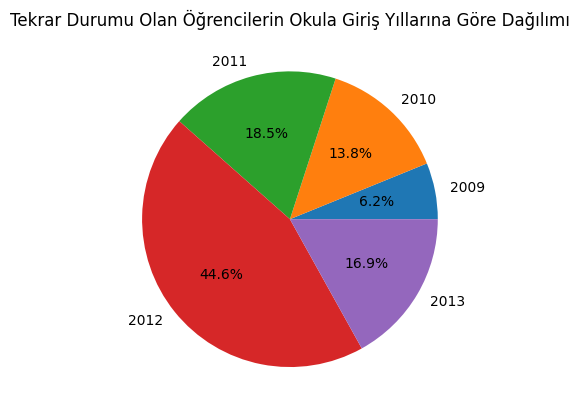

In [2]:
import matplotlib.pyplot as plt

grouped_data = ogr_list.groupby(['Okula Giriş Yılı', 'Tekrar Durumu']).size().unstack().fillna(0)

grouped_data.plot(kind='barh', stacked=True)

grouped_data2 = ogr_list.loc[ogr_list['Tekrar Durumu'] == 'Tekrar'] .groupby('Okula Giriş Yılı').size()
plt.xlabel('Öğrenci Sayısı')
plt.ylabel('Okula Giriş Yılı')
plt.title('Öğrencilerin Okula Giriş Yıllarına Göre Tekrar Durumu Dağılımı')
plt.show()

grouped_data2.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tekrar Durumu Olan Öğrencilerin Okula Giriş Yıllarına Göre Dağılımı')
plt.show()




## Soru 3 (20 puan):
* Bu derse ilk kez kaydolan öğrenciler, laboratuvar saatlerine girmek ve orada verilen ödevleri yapmak zorundadır. Derse tekrar kaydolan öğrenciler ise dönem başında laboratuvar saatlerine girmek isteyip istemediklerini bildirmektedirler ve girmek istiyorlarsa yine orada verilen ödevleri yapmak zorundadırlar. Buna göre dersin laboratuvar saatlerine giren öğrencilerin orada verilen ödevlerden aldıkları notları içeren ekteki "Lab Notlari.xls" dosyasını ```lab_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.
* "Lab-* Notu" sütunlarındaki eksik veriler, öğrencinin mazereti nedeniyle ilgili ödevden muaf olduğunu göstermektedir. Buna göre DataFrame'e, öğrencilerin mazeretli olmadıkları laboratuvar saatlerinde verilen ödevlerden aldıkları notların ortalamasını (en düşük 2 not dışarıda bırakılacaktır ve en yakın tamsayıya yuvarlatılacaktır) içeren "Lab Notu" isimli bir sütun ekleyin.
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.
* Lab saatlerinde verilen ödevlerin (10 adet) sınıf not ortalamalarını gösteren bir sütun grafik oluşturun.

Number of Rows:  182
Number of Columns:  11
            Lab-1 Notu  Lab-2 Notu  Lab-3 Notu  Lab-4 Notu  Lab-5 Notu   
Öğrenci No                                                               
MUH1000065        94.0        93.0        98.0        97.0        65.0  \
MUH1000091         0.0         0.0         0.0         0.0         0.0   
MUH1000975        65.0        92.0       100.0        98.0        80.0   
MUH1000990        70.0        88.0        98.0        75.0        50.0   
MUH1200826        58.0        82.0        80.0        66.0        50.0   
...                ...         ...         ...         ...         ...   
MUH1410150         NaN         NaN         NaN        18.0        10.0   
MUH1410152         NaN         NaN         NaN         0.0        40.0   
MUH1410153         NaN         NaN         NaN         0.0         0.0   
MUH1410154         NaN         NaN         NaN        66.0        36.0   
MUH1410155         NaN         NaN         NaN         5.0         0

<AxesSubplot:>

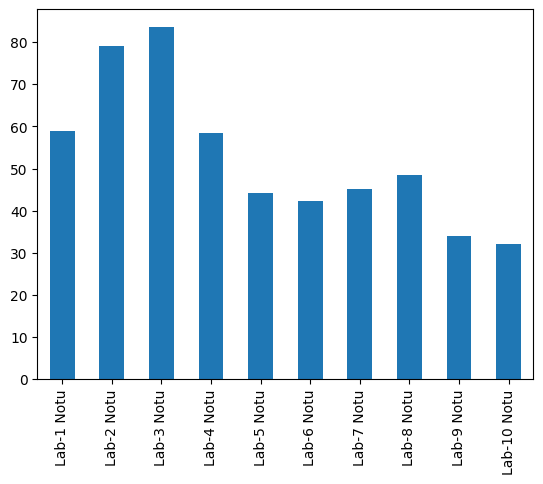

In [3]:


lab_notlari =  pd.read_excel("Lab notlari.xls",index_col=1)
lab_notlari.drop('No', axis=1, inplace=True)
lab_notlari.fillna(value=np.nan,inplace=True)

lab_notlari['Lab Notu'] = lab_notlari.iloc[:,0:10].agg(lambda x: np.round(np.mean(sorted(x.dropna())[2:])), axis=1).astype('Int64')

print("Number of Rows: ", len(lab_notlari.axes[0]))
print("Number of Columns: ",len(lab_notlari.axes[1]))

print(lab_notlari)


lab_notlari.iloc[:,:-1].mean().plot(kind='bar')




## Soru 4 (20 puan):
* Bu derste öğrencilere 2 adet proje verilmektedir. Öğrenciler projeleri isterlerse tek başlarına, isterlerse 2 kişilik grup oluşturarak yapabilmektedir. Grup oluşturulurken öğrencilerin numaraları alt çizgi (_) karakteri ile birleştirilmektedir. Grup üyeleri projeden aynı notu almaktadır. Buna göre projeleri teslim eden öğrencilerin/grupların projelerden aldıkları notları içeren ekteki "1.Proje Notlari.xls" ve "2.Proje Notlari.xls" dosyalarını sırasıyla ```proje1_notlari``` ve ```proje2_notlari``` adlı DataFrame'lere okuyun.
* İkinci proje notu en yüksek ve en düşük olan öğrencilerin/grupların numaralarını yazdırın.
* ```proje1_notlari``` ve ```proje2_notlari``` adlı DataFrame'leri, index'i "Öğrenci No" olan ve projeyi teslim eden her öğrencinin ayrı ayrı notunun yer aldığı DataFrame'ler haline getirin. Bir başka deyişle, ```proje1_notlari``` DataFrame'inin index'i "Öğrenci No" olmalı ve "1. Proje Notu" isimli bir sütun içermelidir. Benzer şekilde, ```proje2_notlari``` DataFrame'inin index'i "Öğrenci No" olmalı ve "2. Proje Notu" isimli bir sütun içermelidir.
* En son oluşan DataFrame'lerin satır sayılarını yazdırın.

In [4]:
proje1_notlari = pd.read_excel("1.Proje Notlari.xls")
proje2_notlari = pd.read_excel("2.Proje Notlari.xls")
en_yuksek_not = proje2_notlari["2. Proje Notu"].max()
en_dusuk_not = proje2_notlari["2. Proje Notu"].min()

print("İkinci projenin en yüksek notunu alan öğrenciler/gruplar:")
print(proje2_notlari.max()["Öğrenci/Grup No "])

print("\nİkinci projenin en düşük notunu alan öğrenciler/gruplar:")
print(proje2_notlari.min()["Öğrenci/Grup No "])

proje1_notlari.drop("No", axis=1,inplace=True)
proje1_notlari["Öğrenci/Grup No "] = proje1_notlari["Öğrenci/Grup No "].str.split('_')
proje1_notlari = proje1_notlari.explode("Öğrenci/Grup No ")
proje1_notlari.rename(columns={"Öğrenci/Grup No ": "Öğrenci No"}, inplace=True)
proje1_notlari.set_index("Öğrenci No",inplace=True)
print(proje1_notlari)


proje2_notlari.drop("No", axis=1,inplace=True)
proje2_notlari["Öğrenci/Grup No "] = proje2_notlari["Öğrenci/Grup No "].str.split('_')
proje2_notlari = proje2_notlari.explode("Öğrenci/Grup No ")
proje2_notlari.rename(columns={"Öğrenci/Grup No ": "Öğrenci No"}, inplace=True)
proje2_notlari.set_index("Öğrenci No",inplace=True)
print(proje2_notlari)
print("Number of Rows: ", len(proje1_notlari.axes[0]))
print("Number of Rows: ", len(proje2_notlari.axes[0]))


İkinci projenin en yüksek notunu alan öğrenciler/gruplar:
MUH1410154

İkinci projenin en düşük notunu alan öğrenciler/gruplar:
MUH0910100
            1. Proje Notu
Öğrenci No               
MUH0900038             30
MUH1100009             30
MUH1000002             49
MUH1000011             78
MUH1000029             37
...                   ...
MUH1410135              0
MUH1410148             54
MUH1410132             54
MUH1410152              0
MUH1410140              0

[218 rows x 1 columns]
            2. Proje Notu
Öğrenci No               
MUH0910100             40
MUH1000002             15
MUH1000029             31
MUH0900056             31
MUH1000059             70
...                   ...
MUH1410141             77
MUH1410145              8
MUH1410148             41
MUH1410132             41
MUH1410154             33

[181 rows x 1 columns]
Number of Rows:  218
Number of Rows:  181


## Soru 5 (3 puan):
* Bu dersin ara sınav notlarını içeren ekteki "Arasinav Notlari.xls" dosyasını ```vize_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.

In [5]:
vize_notlari = pd.read_excel("Arasinav Notlari.xls", index_col=1)
vize_notlari.drop("No", axis=1,inplace=True)
vize_notlari

,Arasınav Notu
Öğrenci No,
MUH0907596,27.0
MUH0910100,34.0
MUH0900038,38.0
MUH0900056,80.0
MUH1000002,32.0
...,...
MUH1410150,78.0
MUH1410152,68.0
MUH1410153,NaN


## Soru 6 (5 puan):
* Bu dersin final sınavı notlarını içeren ekteki "Final Sinavi Notlari.xls" dosyasını, son 2 satırı hariç, ```final_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.
* "Final Sınavı Notu" sütunundaki öğrencinin sınava girmediğini belirten ```-1``` değerlerini ```NaN``` değeri ile değiştirin.

In [6]:
final_notlari = pd.read_excel("Final Sinavi Notlari.xls", index_col=1, skipfooter=2)
final_notlari.drop("No", axis=1,inplace=True)
final_notlari["Final Sınavı Notu"].replace(-1, np.nan, inplace=True)
final_notlari

,Final Sınavı Notu
Öğrenci No,
MUH0907596,4.0
MUH0910100,41.0
MUH0900038,NaN
MUH0900056,29.0
MUH1000002,NaN
...,...
MUH1410150,40.0
MUH1410152,30.0
MUH1410153,NaN


## Soru 7 (3 puan):
* Bu dersin bütünleme sınavına giren öğrencilerin notlarını içeren ekteki "Butunleme Sinavi Notlari.xls" dosyasını ```butunleme_notlari``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* "Öğrenci No" sütununu DataFrame'in index'i yapın.

In [7]:
butunleme_notlari = pd.read_excel("Butunleme Sinavi Notlari.xls", index_col=1)
butunleme_notlari.drop("No", axis=1,inplace=True)
butunleme_notlari

,Bütünleme Sınavı Notu
Öğrenci No,
MUH0907596,1
MUH0900056,13
MUH1000029,62
MUH1000990,47
MUH1100024,49
...,...
MUH1410142,77
MUH1410148,57
MUH1410150,76


## Soru 8 (24 puan):
* Derse kayıtlanan tüm öğrencilerin tüm notlarını içermesi için ```ogr_list``` adlı DataFrame'i "Öğrenci No" aracılığıyla diğer tüm DataFrame'ler ile birleştirin, bu sırada ```lab_notlari``` DataFrame'inden sadece "Lab Notu" sütununun alınmasını sağlayın.
* ```ogr_list``` DataFrame'nin "1. Proje Notu", "2. Proje Notu" ve "Arasınav Notu" sütunlarındaki ```Nan``` değerlerini ```0``` değeri ile değiştirin.
* Öğrencilerin bu derse ilişkin proje notu, 1. proje notunun 3/7'si ile 2. proje notunun 4/7'si toplanarak (en yakın tamsayıya yuvarlatılacaktır) bulunmaktadır. Buna göre DataFrame'e, "Proje Notu" isimli bir sütun ekleyin.
* Bu derse tekrar kaydolan öğrencilerden laboratuvar saatlerine girmek isteyen, dolayısıyla orada verilen ödevleri de yapan öğrencilerin numara, lab notu ve proje notu verilerini listeleyin.
* Bu derse tekrar kaydolan öğrencilerden laboratuvar saatlerine girmek istemeyen, dolayısıyla orada verilen ödevleri yapmayan öğrencilerin proje notları, aynı zamanda lab notu yerine de sayılmaktadır. Buna göre "Lab Notu" sütunundaki ```Nan``` değerlerini, ilgili öğrencilerin "Proje Notu" sütunundaki değerleri ile değiştirin.
* Öğrencilerin bu derse ilişkin dönem sonu notu, lab notunun %13'ü, proje notunun %22,75'i, ara sınav notunun %29,25'i ve final/bütünleme sınavı notunun %35'i toplanarak (en yakın tamsayıya yuvarlatılacaktır) bulunmaktadır. Ancak öğrenci final ve bütünleme sınavlarına girmediyse, dönem sonu notu doğrudan 0 olmaktadır. Ayrıca öğrenci hem final hem bütünleme sınavına girdiyse, final sınavı notu geçerliliğini kaybetmektedir. Buna göre DataFrame'e, "Dönem Sonu Notu" isimli bir sütun ekleyin.

In [8]:
merged = ogr_list.merge(lab_notlari[['Lab Notu']], on='Öğrenci No',how='outer').merge(proje1_notlari,on='Öğrenci No',how='outer').merge(proje2_notlari,on='Öğrenci No',how='outer').merge(vize_notlari,on='Öğrenci No',how='outer').merge(final_notlari,on='Öğrenci No',how='outer').merge(butunleme_notlari,on='Öğrenci No',how='outer')
ogr_list = merged
ogr_list.fillna({'1. Proje Notu':0, '2. Proje Notu':0, 'Arasınav Notu':0}, inplace=True)


ogr_list['Proje Notu'] = ogr_list[['1. Proje Notu', '2. Proje Notu']].agg(lambda x: round(x[0] * 3 / 7 + x[1] * 4 / 7), axis=1).astype('Int64')

df1 = ogr_list.loc[(ogr_list['Tekrar Durumu'] == 'Tekrar') & (ogr_list['Lab Notu']!= np.nan),['Lab Notu', 'Proje Notu']]
print("Dersi Tekrar Alıp Lab Dersine girenler:\n")
print(df1) 
ogr_list.loc[(ogr_list['Tekrar Durumu'] == 'Tekrar') & (pd.isna(ogr_list["Lab Notu"])), 'Lab Notu'] = ogr_list['Proje Notu']


def calculate_dönem_sonu_notu(x):
    if pd.isna(x[3]) and pd.isna(x[4]):
        return 0
    elif not pd.isna(x[3]) and  pd.isna(x[4]):
        return np.round(x[0] * 0.13 + x[1] * 0.2275 + x[2] * 0.2925 + x[3] * 0.35).astype(float)
    else:
        return np.round(x[0] * 0.13 + x[1] * 0.2275 + x[2] * 0.2925 + x[4] * 0.35).astype(float)

ogr_list['Dönem Sonu Notu'] = ogr_list[['Lab Notu','Proje Notu', 'Arasınav Notu', 'Final Sınavı Notu','Bütünleme Sınavı Notu']].apply(calculate_dönem_sonu_notu, axis=1).astype('Int64')    

ogr_list.head(20)

Dersi Tekrar Alıp Lab Dersine girenler:

            Lab Notu  Proje Notu
Öğrenci No                      
MUH1000065        84          54
MUH1200826        64          82
MUH1300262        72          57
MUH1300278        58          94
MUH1300304        66          90
MUH1301289         5          33


,No,Tekrar Durumu,Okula Giriş Yılı,Lab Notu,1. Proje Notu,2. Proje Notu,Arasınav Notu,Final Sınavı Notu,Bütünleme Sınavı Notu,Proje Notu,Dönem Sonu Notu
Öğrenci No,,,,,,,,,,,
MUH0907596,1,Tekrar,2009,0,0.0,0.0,27.0,4.0,1.0,0,8
MUH0910100,2,Tekrar,2009,64,95.0,40.0,34.0,41.0,NaN,64,47
MUH0900038,3,Tekrar,2009,13,30.0,0.0,38.0,NaN,NaN,13,0
MUH0900056,4,Tekrar,2009,18,0.0,31.0,80.0,29.0,13.0,18,34
MUH1000002,5,Tekrar,2010,30,49.0,15.0,32.0,NaN,NaN,30,0
MUH1000011,6,Tekrar,2010,33,78.0,0.0,97.0,54.0,NaN,33,59
MUH1000026,7,Tekrar,2010,0,0.0,0.0,18.0,10.0,NaN,0,9
MUH1000029,8,Tekrar,2010,34,37.0,31.0,76.0,30.0,62.0,34,56
MUH1000045,9,Tekrar,2010,0,0.0,0.0,0.0,NaN,NaN,0,0


## Soru 9 (13 puan):
* Dönem sonu notuna göre en başarılı 5 öğrencinin lab, proje, ara sınav ve final sınavı notlarını gösteren bir çizgi grafik oluşturun.
* Dönem sonu notlarının dağılımını bir histogram grafiği ile gösterin.
* 15 ve üzerindeki dönem sonu notlarını dikkate alarak sınıfın ortalamasını, standart sapmasını ve medyanını bulun.

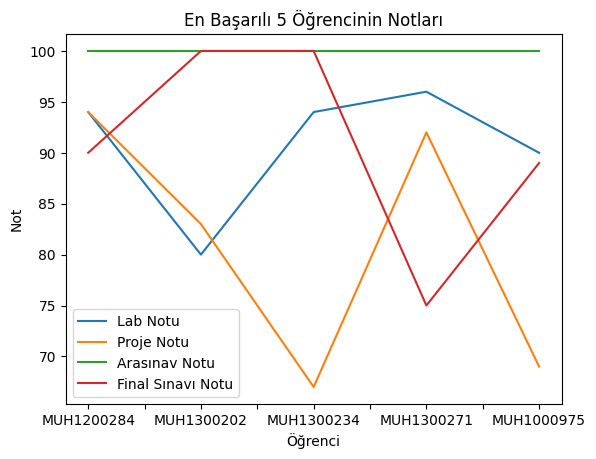

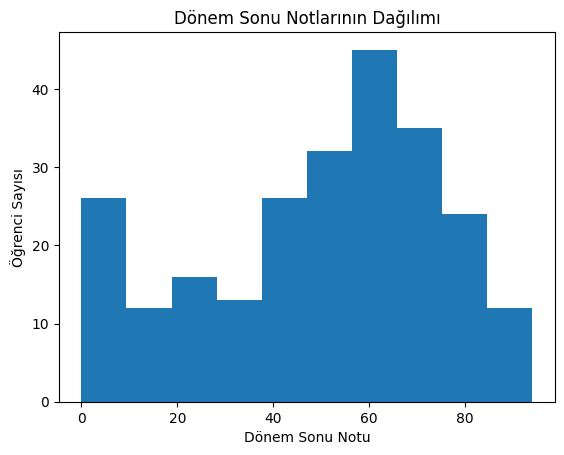

Sınıfın Ortalaması: 57.1219512195122
Sınıfın Standart Sapması: 18.156988502177256
Sınıfın Medyanı: 58.0


In [9]:
ogr_list.nlargest(5, 'Dönem Sonu Notu')[['Lab Notu', 'Proje Notu', 'Arasınav Notu', 'Final Sınavı Notu']].plot(kind='line')
plt.xlabel('Öğrenci')
plt.ylabel('Not')
plt.title('En Başarılı 5 Öğrencinin Notları')
plt.show()

ogr_list['Dönem Sonu Notu'].plot(kind='hist', bins=10)
plt.xlabel('Dönem Sonu Notu')
plt.ylabel('Öğrenci Sayısı')
plt.title('Dönem Sonu Notlarının Dağılımı')
plt.show()


mean = merged[merged['Dönem Sonu Notu'] >= 15]['Dönem Sonu Notu'].mean()
std = merged[merged['Dönem Sonu Notu'] >= 15]['Dönem Sonu Notu'].std()
median = merged[merged['Dönem Sonu Notu'] >= 15]['Dönem Sonu Notu'].median()

print("Sınıfın Ortalaması:", mean)
print("Sınıfın Standart Sapması:", std)
print("Sınıfın Medyanı:", median)


## Soru 10 (8 puan):
* Ara sınav notu ile 1. proje notu arasındaki ve final sınavı notu ile 2. proje notu arasındaki ilişkileri, aynı figürde yan yana iki saçılım grafiği (subplot) olarak gösterin. Grafiklere uygun birer başlık (```title```) atayın.

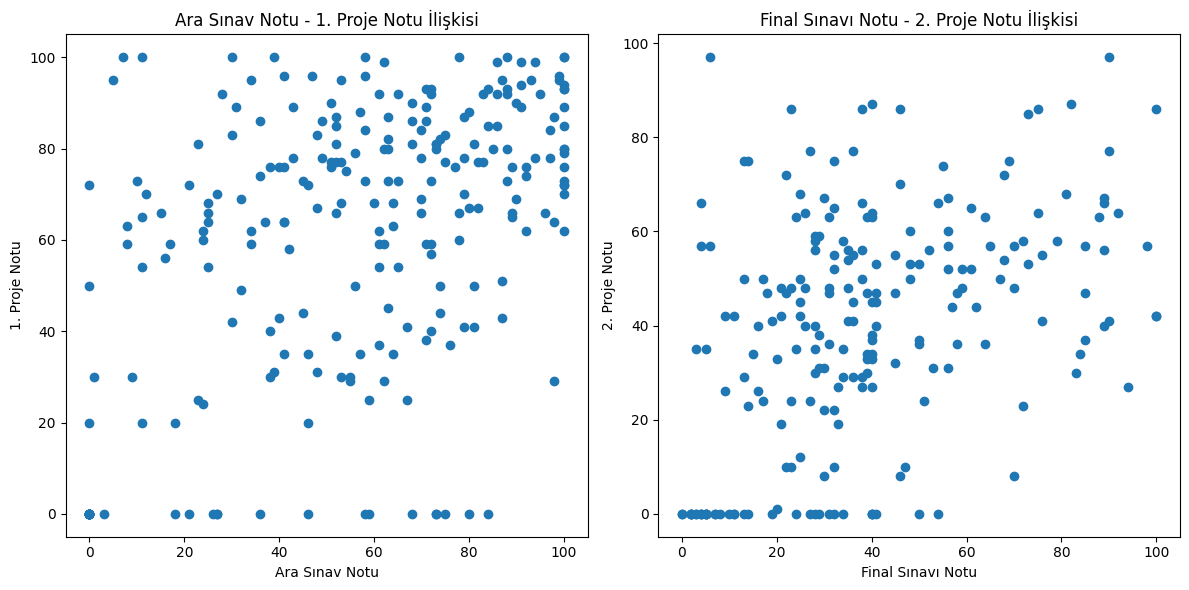

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(ogr_list['Arasınav Notu'], merged['1. Proje Notu'])
axs[0].set_xlabel('Ara Sınav Notu')
axs[0].set_ylabel('1. Proje Notu')
axs[0].set_title('Ara Sınav Notu - 1. Proje Notu İlişkisi')

axs[1].scatter(ogr_list['Final Sınavı Notu'], merged['2. Proje Notu'])
axs[1].set_xlabel('Final Sınavı Notu')
axs[1].set_ylabel('2. Proje Notu')
axs[1].set_title('Final Sınavı Notu - 2. Proje Notu İlişkisi')

plt.tight_layout()
plt.show()
